In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import sys
import seaborn as sns
import matplotlib as mpl
from matplotlib import rc
from matplotlib.lines import Line2D
from scipy.stats import spearmanr
mpl.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 18})

In [4]:
#### plot the reactivity profiles for 16S/23S for the three reagents tested
#### also plot the reactivity profiles for the U1 snRNP to demonstrate cell permeability of 1AI
#### plot and compare the reactivity profiles for miR17-92 using 1AI vs NAI

In [5]:
nmod_16s = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/11-5-18_ribo/shapemapper_out/nmod_16-23_16S_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')

nmod_23s = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/11-5-18_ribo/shapemapper_out/nmod_16-23_23S_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')

amod_16s = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/11-5-18_ribo/shapemapper_out/amod_16-23_16S_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')

amod_23s = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/11-5-18_ribo/shapemapper_out/amod_16-23_23S_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')

mmod_16s = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/11-5-18_ribo/shapemapper_out/mmod_16-23_16S_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')

mmod_23s = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/11-5-18_ribo/shapemapper_out/mmod_16-23_23S_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')

In [6]:
## load U1snRNP data

u1_a_hu = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap/incell_7-30-18/shapemapper_out/u11ai_Homo_Sapiens_U1_snRNA_DNA_profile.txt', sep='\t', engine='python')
u1_n_hu = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap/incell_7-30-18/shapemapper_out/u1nai_Homo_Sapiens_U1_snRNA_DNA_profile.txt', sep='\t', engine='python')

u1_a_mo = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap/incell_6-11-18_run2/shapemapper_out/u11ai_Mus_musculus_U1_snRNA_DNA_profile.txt', sep='\t', engine='python')
u1_n_mo = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap/incell_6-11-18_run2/shapemapper_out/u1nai_Mus_musculus_U1_snRNA_DNA_profile.txt', sep='\t', engine='python')
u1_f_mo = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap/incell_6-11-18_run2/shapemapper_out/u1fai_Mus_musculus_U1_snRNA_DNA_profile.txt', sep='\t', engine='python')


u1_a_hu.head()

,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Untreated_mutations,Untreated_read_depth,Untreated_effective_depth,Untreated_rate,Denatured_mutations,Denatured_read_depth,Denatured_effective_depth,Denatured_rate,Reactivity_profile,Std_err,HQ_profile,HQ_stderr,Norm_profile,Norm_stderr
0,1,A,0,157955,132424,0.000000,0,390377,363096,0.000000,0,131839,115820,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2,U,0,158713,119365,0.000000,0,391319,344047,0.000000,0,132282,106353,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A,33,158919,126474,0.000261,67,391897,351216,0.000191,27,132494,110100,0.000245,0.286086,0.215333,0.286086,0.215333,0.686539,0.516748
3,4,C,33,159072,127487,0.000259,113,392312,351487,0.000321,37,132637,109926,0.000337,-0.186106,0.164107,-0.186106,0.164107,-0.446610,0.393818
4,5,U,219,159227,137953,0.001587,590,392695,368039,0.001603,191,132811,116940,0.001633,-0.009547,0.077116,-0.009547,0.077116,-0.022911,0.185060


In [13]:
## load miR 17-92 data

a25 = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/8-5-19_1792_nanocompare/shapemapper_out/a25_miR17-92_DNA_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')

n25 = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/8-5-19_1792_nanocompare/shapemapper_out/n25_miR17-92_DNA_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')


(-0.5, 10)

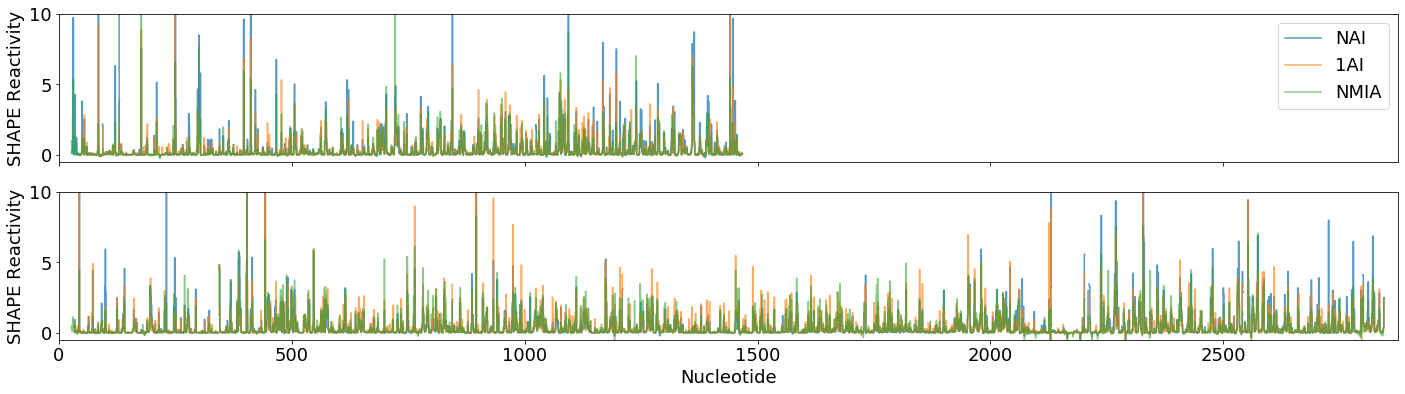

In [8]:
fig1, axs = plt.subplots(2,1, figsize=(24,6), sharex=True)
axs[0].step(nmod_16s['Nucleotide'], nmod_16s['Norm_profile'], where='mid', alpha=0.75, label='NAI')
axs[0].step(amod_16s['Nucleotide'], amod_16s['Norm_profile'], where='mid', alpha=0.65, label='1AI')
axs[0].step(mmod_16s['Nucleotide'], mmod_16s['Norm_profile'], where='mid', alpha=0.55, label='NMIA')
axs[0].set_ylabel('SHAPE Reactivity')
axs[0].legend(loc='upper right')
axs[0].set_xlim(0, 1475)
axs[0].set_ylim(-0.5, 10)
axs[1].step(nmod_23s['Nucleotide'], nmod_23s['Norm_profile'], where='mid', alpha=0.75, label='NAI')
axs[1].step(amod_23s['Nucleotide'], amod_23s['Norm_profile'], where='mid', alpha=0.65, label='1AI')
axs[1].step(mmod_23s['Nucleotide'], mmod_23s['Norm_profile'], where='mid', alpha=0.55, label='NMIA')
axs[1].set_ylabel('SHAPE Reactivity')
axs[1].set_xlabel('Nucleotide')
axs[1].set_xlim(0, 2875)
axs[1].set_ylim(-0.5, 10)
#fig1.tight_layout()
#sns.despine(top = True, right = True)
#fig1.savefig('plots/reagent_comparison_v1.pdf')

In [9]:
df_combine_16s = pd.DataFrame({'nmod_prof': nmod_16s['Norm_profile'], 'amod_prof': amod_16s['Norm_profile'], 'mmod_prof':mmod_16s['Norm_profile']}, index = nmod_16s['Nucleotide'] )
df_combine_23s = pd.DataFrame({'nmod_prof': nmod_23s['Norm_profile'], 'amod_prof': amod_23s['Norm_profile'], 'mmod_prof':mmod_23s['Norm_profile']}, index = nmod_23s['Nucleotide'])

df_combine_16s = df_combine_16s.dropna()
df_combine_23s = df_combine_23s.dropna()

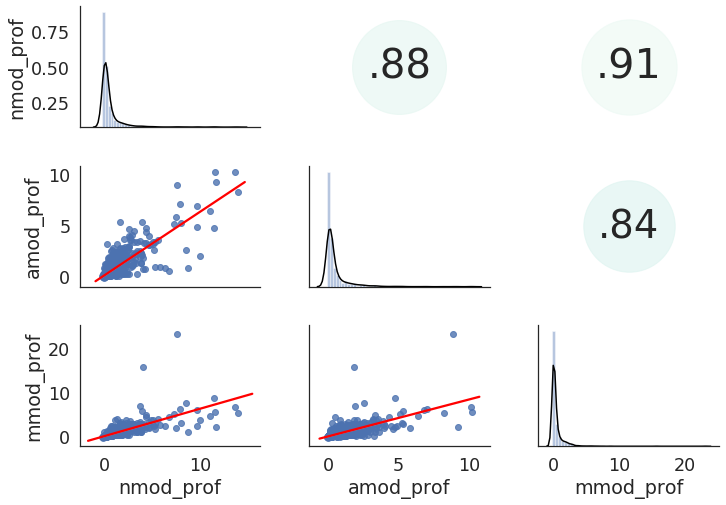

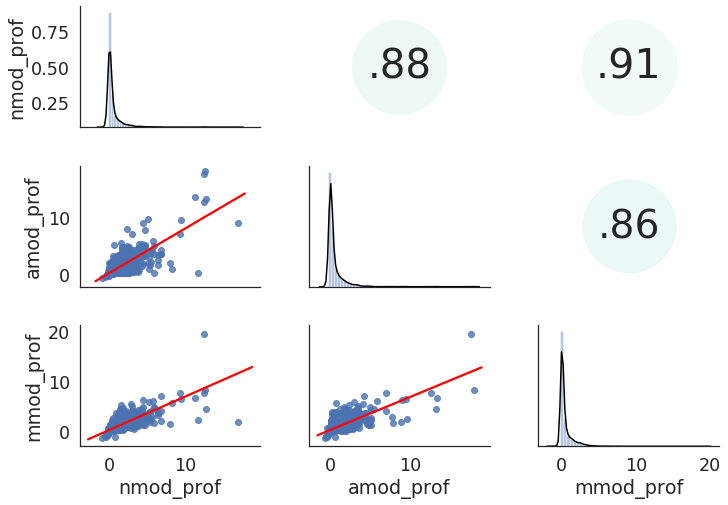

In [10]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="cubehelix",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_combine_16s, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=False, ci=True, line_kws={'color': 'red'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

h = sns.PairGrid(df_combine_23s, aspect=1.4, diag_sharey=False)
h.map_lower(sns.regplot, lowess=False, ci=True, line_kws={'color': 'red'})
h.map_diag(sns.distplot, kde_kws={'color': 'black'})
h.map_upper(corrdot)



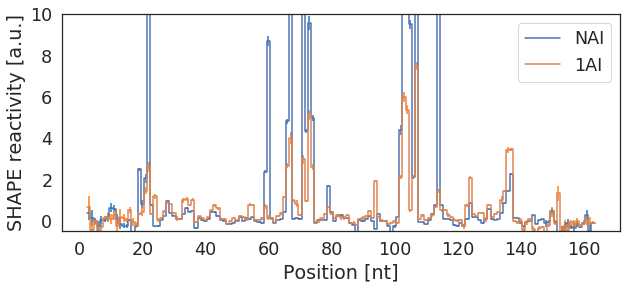

In [11]:
#### U1 snRNP in cell probing:
fig3, axs = plt.subplots(1,1, figsize=(10,4))
axs.step(u1_n_hu['Nucleotide'], u1_n_hu['Norm_profile'], where='mid', label = 'NAI')
axs.errorbar(u1_n_hu['Nucleotide'], u1_n_hu['Norm_profile'], yerr=u1_n_hu['Norm_stderr'], fmt='none', label='', color='tab:blue')
axs.step(u1_a_hu['Nucleotide'], u1_a_hu['Norm_profile'], where='mid', label = '1AI')
axs.errorbar(u1_a_hu['Nucleotide'], u1_a_hu['Norm_profile'], yerr=u1_a_hu['Norm_stderr'], fmt='none', label='', color='tab:orange')

axs.set_ylim(-0.5, 10)
axs.set_xlabel('Position [nt]')
axs.set_ylabel('SHAPE reactivity [a.u.]')
_=axs.legend()


In [12]:
spearmanr(u1_n_hu['Norm_profile'].dropna(), u1_a_hu['Norm_profile'].dropna())

SpearmanrResult(correlation=0.723703128594433, pvalue=2.121945924419092e-27)

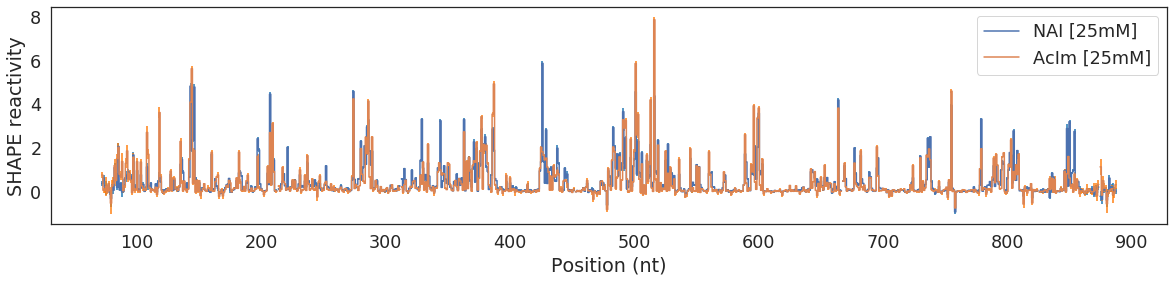

In [25]:
fig4, axs = plt.subplots(1,1, figsize=(20, 4))
axs.step(n25['Nucleotide'], n25['Norm_profile'], where='mid', label='NAI [25mM]')
axs.errorbar(n25['Nucleotide'], n25['Norm_profile'], yerr=n25['Norm_stderr'], fmt='none', label='', color='tab:blue')
axs.step(a25['Nucleotide'], a25['Norm_profile'], where='mid', label='AcIm [25mM]')
axs.errorbar(a25['Nucleotide'], a25['Norm_profile'], yerr=a25['Norm_stderr'], fmt='none', label='', color='tab:orange')
axs.set_ylabel('SHAPE reactivity')
axs.set_xlabel('Position (nt)')
_=axs.legend()

#fig4.savefig('plots/1792_1ai_nai_v1.pdf')

In [18]:
a25_prof = a25['Norm_profile'].fillna(value=0)
n25_prof = n25['Norm_profile'].fillna(value=0)

spearmanr(a25_prof, n25_prof)

SpearmanrResult(correlation=0.7827250966151279, pvalue=1.1745497184755968e-197)